## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

if not os.path.isdir('models'): 
    os.mkdir('models')   

In [3]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential  #Sequential Model
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation  #Different layers of CNN
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping

In [4]:
pip install emnist

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#from emnist import list_datasets

In [ ]:
#list_datasets()

In [4]:
from emnist import extract_training_samples 
X_train,y_train = extract_training_samples('byclass')

In [5]:
from emnist import extract_test_samples
X_test,y_test  = extract_test_samples('byclass')

In [6]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (697932, 28, 28)
y_train shape:  (697932,)
X_test shape:  (116323, 28, 28)
y_test shape:  (116323,)


In [ ]:
#In Training Set there are 6,97,932 images of 28 by 28 pixels
#In test Set there are 1,16,323 images of 28 by 28 pixels

## Visualization

	  Label : 28


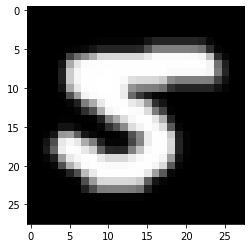

In [7]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

#by adding ; at the end you don't get that matplotlib line....<matplotlib.image.AxesImage at 0x7fa9f8b04a20>

	  Label : 24


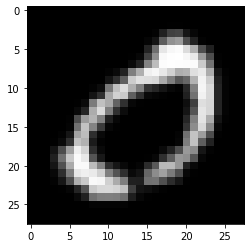

In [8]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

			TABLE



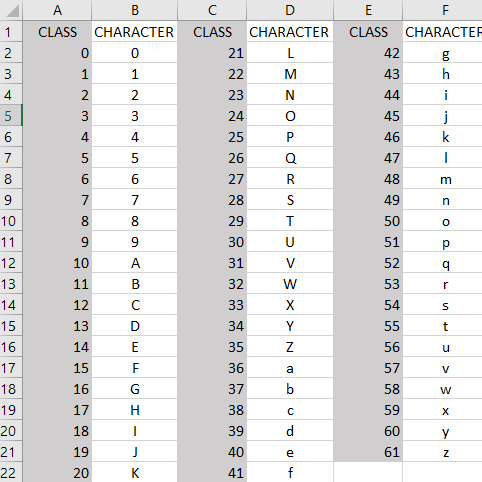

In [9]:
print("\t\t\tTABLE\n")
from IPython.display import Image
Image('Table.png')

In [10]:
classes = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

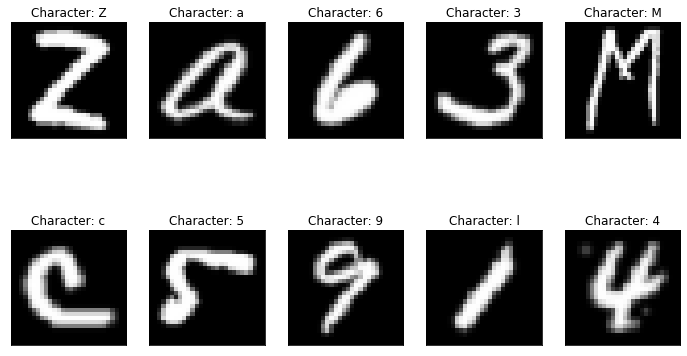

In [11]:
#Checking Training Examples
fig = plt.figure(figsize=(12,7))
for i in range(10):
  plt.subplot( 2, 5 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_train[i], cmap='gray')  # prints image
  plt.yticks([])  #no x and y ticks
  plt.xticks([])
  index = y_train[i]
  plt.title("Character: " + str(classes[index]))      

## Reshaping and One Hot Encoding

In [12]:
#We need to reshape our 3D array to 4D array so it can be used with keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (697932, 28, 28, 1)
X_test shape:  (116323, 28, 28, 1)


In [14]:
X_train = X_train/255  #normalize inputs from 0-255 to 0-1
X_test = X_test/255

In [15]:
from tensorflow.python.keras.utils import to_categorical
#Keras expects "one hot" encoding in multiclass problems for the labels.

print("Shape of y_train:",y_train.shape)
y_train = to_categorical(y_train)   
print("New Shape of y_train:",y_train.shape)
print("\n")
print("Shape of y_test:",y_test.shape)
y_test = to_categorical(y_test)  
print("New Shape of y_test:",y_test.shape)

Shape of y_train: (697932,)
New Shape of y_train: (697932, 62)


Shape of y_test: (116323,)
New Shape of y_test: (116323, 62)


# **MODEL**

In [16]:
#--------------------------------------------
# Train loss : 0.26709693896186193
# Train accuracy : 0.89481497
#--------------------------------------------
# Test loss : 0.3359006342502508
# Test accuracy : 0.8740576
#--------------------------------------------

# DIFFERENCES:
# LOSS       : 0.0688
# ACCURACY  :  0.0207

In [17]:
# ----- Model Stucture -----

# Input - (28x28) pixel image
# 1st Convolutional Layer - 64 filters
# 2nd Convolutional Layer - 128 filters
# 3rd Dense Layer - 512 neurons
# 4th Output Layer - 62 classes

In [19]:
# ----------------  CNN MODEL -------------------
model = Sequential()

# ----------------- Feature Extraction ------------------- ( Convolutional layers )

# ------------- CONVOLUTIONAL LAYER 1 ---------------
model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# ------------- CONVOLUTIONAL LAYER 2 ---------------
model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# ------------------ Classification -----------------------  ( Fully Connected Layer )

# ---------------- DENSE LAYER -------------------
model.add(Flatten()) # Flattening the matrix into 1D array and feed it into a fully connected layer(Dense layer).
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(.5))

# ------------ OUTPUT LAYER ---------------
model.add(Dense(units=62, activation='softmax'))
#ouput layer has 62 neurons because there are 62 classes
#softmax function is used for multi-class classification

In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=1024, 
                    verbose=1,
                    validation_data=(X_test, y_test), #our model dosen't see this validation data...so it does not get trained on it...
                                                    #it's only used for tuning hyperparameters...
                    callbacks=[EarlyStopping(monitor='val_loss',mode='min',patience=2)]
                   )

Train on 697932 samples, validate on 116323 samples
Epoch 1/20
697932/697932 [==============================] - 1149s 2ms/sample - loss: 0.6571 - acc: 0.7934 - val_loss: 0.4009 - val_acc: 0.8550
Epoch 2/20
697932/697932 [==============================] - 1061s 2ms/sample - loss: 0.4271 - acc: 0.8488 - val_loss: 0.3699 - val_acc: 0.8634
Epoch 3/20
697932/697932 [==============================] - 1054s 2ms/sample - loss: 0.3956 - acc: 0.8572 - val_loss: 0.3558 - val_acc: 0.8680
Epoch 4/20
697932/697932 [==============================] - 1092s 2ms/sample - loss: 0.3771 - acc: 0.8621 - val_loss: 0.3474 - val_acc: 0.8707
Epoch 5/20
697932/697932 [==============================] - 1033s 1ms/sample - loss: 0.3645 - acc: 0.8656 - val_loss: 0.3434 - val_acc: 0.8714
Epoch 6/20
697932/697932 [==============================] - 1058s 2ms/sample - loss: 0.3536 - acc: 0.8685 - val_loss: 0.3406 - val_acc: 0.8729
Epoch 7/20
697932/697932 [==============================] - 1049s 2ms/sample - loss: 0.343

## Evaluate on Model

In [22]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print ('Test loss :', loss )
print ('Test accuracy :', accuracy )

116323/116323 [==============================] - 61s 526us/sample - loss: 0.3359 - acc: 0.8741
Test loss : 0.3359006342502508
Test accuracy : 0.8740576


In [23]:
loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=1)
print ('Train loss :', loss1 )
print ('Train accuracy :', accuracy1 )

697932/697932 [==============================] - 391s 560us/sample - loss: 0.2671 - acc: 0.8948
Train loss : 0.26709693896186193
Train accuracy : 0.89481497


Text(0, 0.5, 'Accuracy')

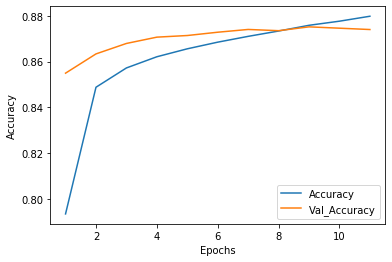

In [25]:
import seaborn as sns
s = len(history.history['acc'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['acc'], label='Accuracy')
sns.lineplot(x = range(1,1+s),y = history.history['val_acc'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

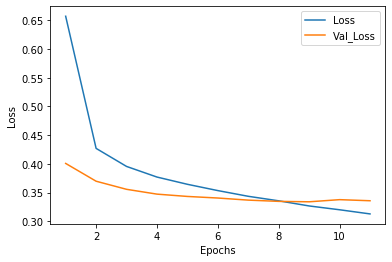

In [26]:
s = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['loss'], label='Loss')
sns.lineplot(x = range(1,1+s),y = history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

## **Predictions**

Predicted Label : Z
Actual Label: Z


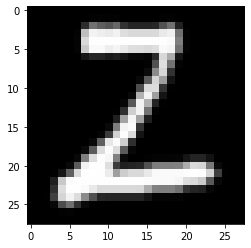

In [32]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label: "+ classes[index])

Predicted Label : r
Actual Label: r


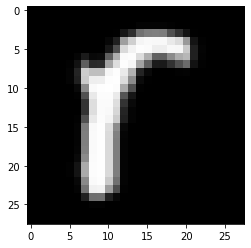

In [31]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label: "+ classes[index])

Predicted Label : D
Actual Label: D


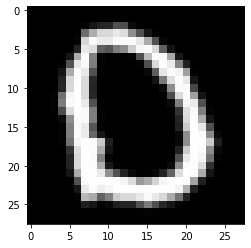

In [33]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label: "+ classes[index])

Predicted Label : 0
Actual Label: 0
Choose :
1. 0
2. o
3. O
1
Your chosen ans is:0


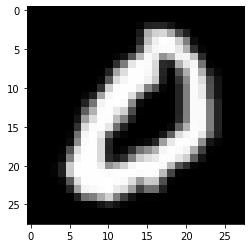

In [34]:
plt.imshow(X_test[107596].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[107596].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
index = y_test[107596].argmax()
print("Predicted Label : "+classes[index1])

print("Actual Label: "+ classes[index])
if classes[index] != classes[index1]:
  print("\n\tIt can be either 0 or O or o")
  

ans = int(input("Choose :\n1. 0\n2. o\n3. O\n"))

if(ans == 1):
  answer = "0"
elif(ans == 2):
  answer="o"
else:
  answer="O"

print("Your chosen ans is:"+answer)

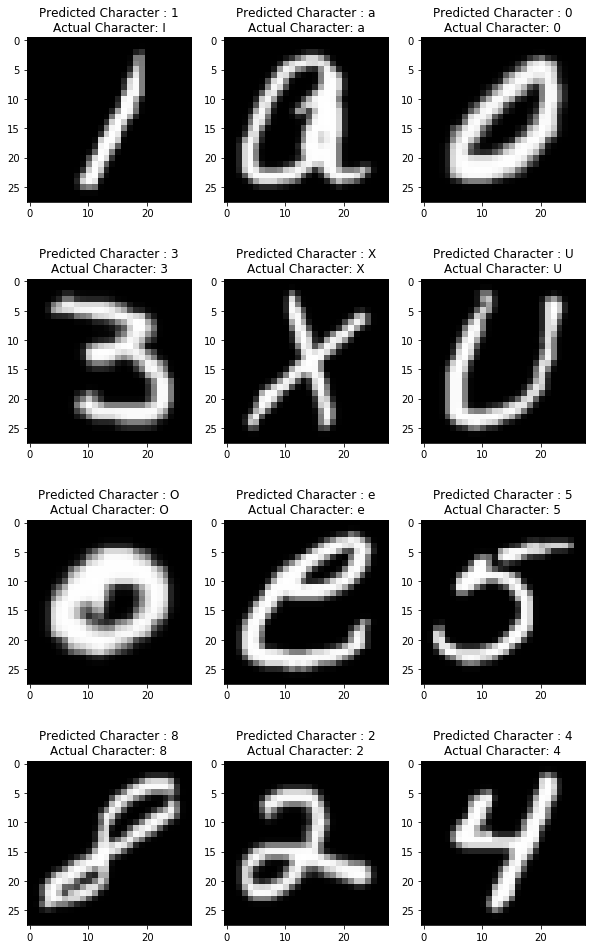

In [35]:
fig = plt.figure(figsize=(10,17))
for i in range(12):
  plt.subplot(4 , 3 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')  # prints image
  predictions = model.predict(X_test[i].reshape(1, 28, 28, 1))
  index1 =predictions.argmax()
  index2 = y_test[i].argmax()
  plt.title("Predicted Character : "+classes[index1]
            +"\n"+"Actual Character: "+ classes[index2])
  